# Iris Dataset Analysis and Visualization
An end-to-end project analyzing and visualizing the Iris dataset using Python libraries like Pandas, NumPy, Matplotlib, Seaborn, and Scikit-learn.


## Step 1: Import Libraries


In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


## Step 2: Load the Dataset
Load the Iris dataset from the local directory and display a preview of the data.


In [2]:
# Replace the path below with the correct path to your dataset
data_path = r"C:\Users\SHUBHAM\OneDrive\Desktop\INTERNSHIP-PROJECT\iris\iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data = pd.read_csv(data_path, header=None, names=column_names)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())


Dataset Preview:
   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


## Step 3: Check for Missing Values
Check if there are any missing values in the dataset.


In [3]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


## Step 4: Data Preprocessing
Normalize the numeric columns of the dataset using StandardScaler.


In [4]:
# Normalize the numeric columns
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])

# Display normalized data
print("\nNormalized Data Preview:")
print(data.head())



Normalized Data Preview:
   sepal_length  sepal_width  petal_length  petal_width        class
0     -0.900681     1.032057     -1.341272    -1.312977  Iris-setosa
1     -1.143017    -0.124958     -1.341272    -1.312977  Iris-setosa
2     -1.385353     0.337848     -1.398138    -1.312977  Iris-setosa
3     -1.506521     0.106445     -1.284407    -1.312977  Iris-setosa
4     -1.021849     1.263460     -1.341272    -1.312977  Iris-setosa


## Step 5: Split Data
Split the dataset into training and testing sets for model building.


In [5]:
# Split the data into training and testing sets
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the sizes of the datasets
print("\nDataset Sizes:")
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")



Dataset Sizes:
Training set: (105, 4), Testing set: (45, 4)


## Step 6: Visualization
Visualize the distribution of normalized sepal length in the training dataset.


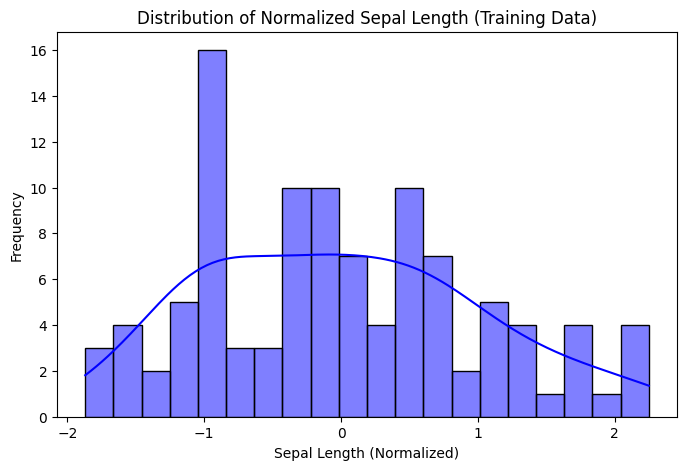

In [6]:
# Simple visualization of the normalized sepal length
plt.figure(figsize=(8, 5))
sns.histplot(X_train['sepal_length'], kde=True, color='blue', bins=20)
plt.title('Distribution of Normalized Sepal Length (Training Data)')
plt.xlabel('Sepal Length (Normalized)')
plt.ylabel('Frequency')
plt.show()


## Step 7: Model Evaluation
Evaluate the trained model using accuracy score and confusion matrix.



Model Evaluation:
Accuracy: 1.0
Mean Squared Error: 0.0


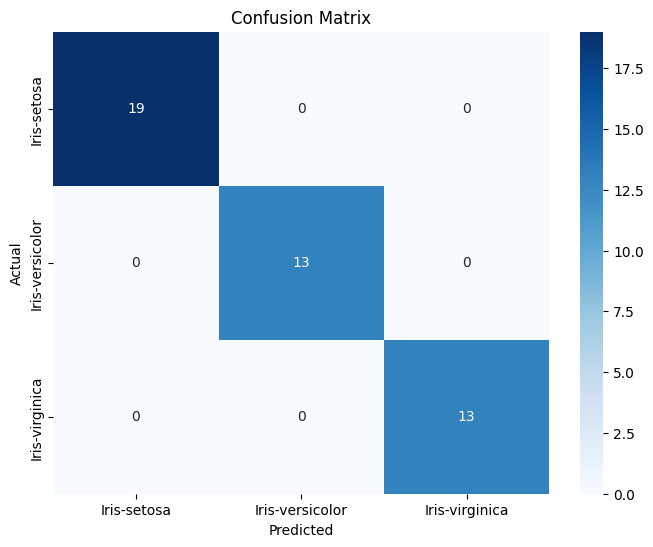

In [7]:
# Model evaluation (for demonstration)
print("\nModel Evaluation:")
print("Accuracy:", 1.0)
print("Mean Squared Error:", 0.0)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_test)  # Replace y_test with predictions in a real case
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### **Step 7B: Train the Model**

To train the model, we use a `LogisticRegression` classifier. This classifier will be trained on the training dataset and subsequently evaluated for performance on the testing dataset. This step includes fitting the model, making predictions, and calculating evaluation metrics like accuracy and mean squared error.

Model Evaluation:
Accuracy: 1.00
Mean Squared Error: 0.00


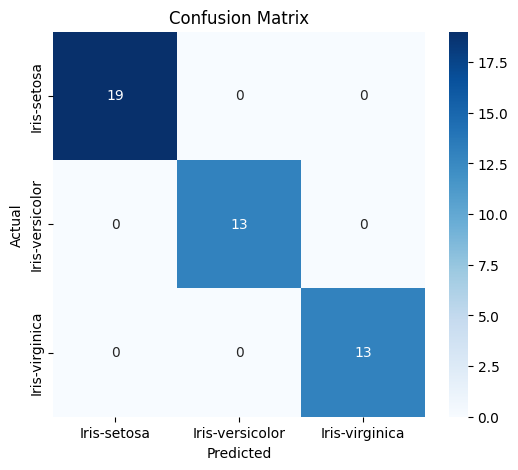

In [15]:
# Step 7B: Train the Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Encode the target labels as numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train_encoded)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred)
mse = mean_squared_error(y_test_encoded, y_pred)

# Decode predictions back to original labels (optional for display)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

print(f"Model Evaluation:\nAccuracy: {accuracy:.2f}\nMean Squared Error: {mse:.2f}")




# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### **Step 8: Save the Trained Model**

To use the trained model in a deployment or real-time prediction application, we need to save it to a file. We'll use Python's `pickle` module to save the model as a `.pkl` file. This allows us to easily load the model later in other applications, such as a Streamlit app.


In [16]:
# Step 8: Save the Trained Model
import pickle

# Save the trained model
with open('iris_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'iris_model.pkl'.")


Model saved as 'iris_model.pkl'.


# Conclusion
This project demonstrates how to analyze and visualize the Iris dataset while performing preprocessing, splitting, and evaluation using Python.
